In [1]:
%matplotlib inline
import tensorflow as tf
from os.path import join
from matplotlib import pyplot as plt
import numpy as np
from scipy.misc import imread

In [2]:
training_filenames = "/home/thalles_silva/DataPublic/PascalVoc2012/train/VOC2012/ImageSets/Segmentation/train.txt"
training_images_dir = "/home/thalles_silva/DataPublic/PascalVoc2012/train/VOC2012/JPEGImages/"
training_labels_dir = "/home/thalles_silva/DataPublic/PascalVoc2012/train/VOC2012/SegmentationClass_1D/"

In [3]:
image_name = "2011_002929"
crop_width, crop_height = 246, 112

In [4]:
def read_image_and_annotation(train_images_dir, train_annotations_dir, image_name):
    # read the input and annotation images
    image = imread(train_images_dir + image_name + ".jpg")
    annotation = imread(train_annotations_dir + image_name + ".png")
    assert (image.dtype) == "uint8"
    assert (annotation.dtype) == "uint8"
    return image, annotation

In [5]:
def random_crop(image_np, annotation_np, crop_width=246, crop_height=112):
    """
    image_np: rgb image shape (H,W,3)
    annotation_np: 1D image shape (H,W,1)
    crop_size: integer
    """
    image_h = image_np.shape[0]
    image_w = image_np.shape[1]
    
    random_x = np.random.randint(0, image_w-crop_width+1) # Return random integers from low (inclusive) to high (exclusive).
    random_y = np.random.randint(0, image_h-crop_height+1) # Return random integers from low (inclusive) to high (exclusive).
    
    offset_x = random_x + crop_width
    offset_y = random_y + crop_height
    
    return image_np[random_y:offset_y,random_x:offset_x:], annotation_np[random_y:offset_y,random_x:offset_x:]

(333, 500, 3)


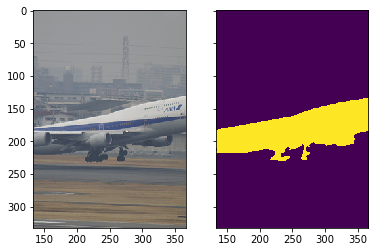

In [6]:
image_np, annotation_np = read_image_and_annotation(training_images_dir, training_labels_dir, image_name)
print(image_np.shape)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image_np)
ax2.imshow(np.squeeze(annotation_np))

In [7]:
cropped_image, cropped_annotation = random_crop(image_np, annotation_np, crop_width, crop_height)

uint8
uint8


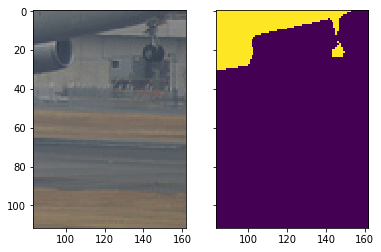

In [8]:
print(cropped_image.dtype)
print(cropped_annotation.dtype)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(cropped_image)
ax2.imshow(np.squeeze(cropped_annotation))

In [9]:
file = open(training_filenames, 'r')
images_filenale_list = [line for line in file]

In [60]:
def next_batch(train_images_dir, train_annotations_dir, image_filenames_list, crop_width, crop_height, batch_size=5):
    """
    return
    batch_images shape (batch_size, crop_size, crop_size, 3)
    batch_annotations shape (batch_size, crop_size, crop_size)
    """
    batch_images = None
    batch_labels = None
    print("Aqui")
    for image_counter, image_name in enumerate(image_filenames_list, 1):
        print(image_name)
        image_np, annotation_np = read_image_and_annotation(train_images_dir, train_annotations_dir, image_name.strip())

        cropped_image, cropped_annotation = random_crop(image_np, annotation_np, crop_width, crop_height)
        cropped_image = np.expand_dims(cropped_image, axis=0)
        cropped_annotation = np.expand_dims(cropped_annotation, axis=0)

        if batch_images is None:
            batch_images = cropped_image
            batch_labels = cropped_annotation
        else:
            #print(batch_images.shape, cropped_image.shape)
            batch_images = np.concatenate((batch_images, cropped_image), axis=0)
            batch_labels = np.concatenate((batch_labels, cropped_annotation), axis=0)

        if batch_images.shape[0] == batch_size:
            yield batch_images, batch_labels
            batch_images = None
            batch_labels = None
    
    # at the end of an epoch, shuffle the dataset image names
    np.random.shuffle(image_filenames_list)

In [62]:
for batch_image, batch_annotations in next_batch(training_images_dir, training_labels_dir, images_filenale_list, crop_width, crop_height, 20):
    print(batch_image.shape)

Aqui
2010_000002

2008_008462

2010_000063

2009_001096

2008_003691

2007_009322

2007_004081

2010_001457

2007_007098

2007_001602

2007_000528

2008_000336

2009_003039

2011_001166

2008_000841

2008_000103

2011_000758

2008_006908

2010_003534

2008_002067

(20, 112, 246, 3)
2008_005342

2010_000978

2009_000103

2011_001695

2010_005678

2008_000361

2011_002553

2011_002715

2009_002422

2009_003646

2010_001177

2008_005945

2010_005932

2010_004773

2008_000870

2009_000444

2007_003788

2010_002039

2010_003269

2011_002935

(20, 112, 246, 3)
2010_004144

2010_002166

2008_000105

2010_005223

2009_000420

2007_000876

2010_002794

2011_000934

2007_002227

2009_001390

2007_000733

2011_001866

2008_002123

2009_004464

2007_009527

2011_002585

2009_004479

2009_003519

2010_000187

2011_002300

(20, 112, 246, 3)
2007_006212

2011_002956

2008_001137

2007_006303

2011_002410

2007_004830

2010_003887

2011_001904

2010_005232

2007_003593

2009_005247

2007_001960

2008_

2009_003340

2011_001991

2007_001149

2009_002204

2010_004721

2008_004321

2010_000661

2009_004643

2009_003249

2007_006865

(20, 112, 246, 3)
2009_004888

2008_006558

2007_007447

2009_002849

2007_007387

2007_004481

2007_005043

2007_007698

2009_002988

2011_001875

2008_003585

2007_006641

2010_002020

2007_007021

2009_004105

2009_004328

2007_002668

2008_004838

2009_000895

2008_005541

(20, 112, 246, 3)
2007_003205

2008_002160

2009_004829

2008_000197

2010_005505

2007_002105

2008_000540

2010_005758

2011_002134

2008_004112

2007_000738

2007_009788

2010_001944

2009_001828

2011_001175

2010_001676

2009_002715

2008_002032

2007_009605

2007_006066

(20, 112, 246, 3)
2007_009597

2008_008773

2009_003921

2009_003468

2007_000549

2009_000532

2011_000197

2009_001744

2010_005835

2011_000589

2011_003255

2009_004191

2010_002556

2008_002551

2010_004370

2011_001139

2009_002314

2009_001117

2010_002203

2010_003737

(20, 112, 246, 3)
2009_001516

2008_

2008_000832

2010_005500

2011_000768

2010_000885

2007_002954

2009_004091

2011_002752

(20, 112, 246, 3)
2009_001070

2010_004060

2010_000436

2010_001245

2009_004539

2009_003975

2011_000359

2007_009550

2010_002379

2008_001716

2010_003384

2007_006317

2009_002460

2007_004769

2007_008307

2010_003696

2007_001857

2008_001610

2009_001095

2008_002471

(20, 112, 246, 3)
2008_002425

2007_007890

2007_009422

2008_005706

2010_005721

2010_001347

2008_003168

2009_000655

2011_001710

2009_002019

2010_000772

2009_002567

2010_005028

2008_000716

2010_002154

2008_000273

2011_000882

2008_005874

2011_001967

2007_009030

(20, 112, 246, 3)
2009_000887

2007_005902

2007_005248

2009_002245

2007_007048

2010_005876

2008_003774

2009_001964

2011_002341

2009_001388

2009_004301

2007_009759

2009_001615

2007_006400

2010_005951

2011_000003

2007_003778

2009_001104

2009_005120

2009_001871

(20, 112, 246, 3)
2007_003190

2009_003088

2008_006877

2008_000217

2007_

In [52]:
print(batch_image.shape)
print(batch_annotations.shape)

(20, 112, 246, 3)
(20, 112, 246)


(112, 246, 3)
(112, 246)


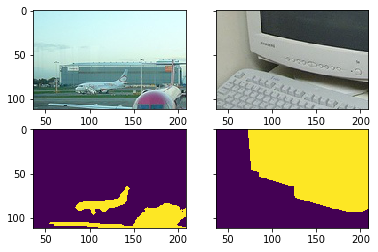

In [53]:
print(cropped_image.shape)
print(cropped_annotation.shape)
f, (ax1, ax2)= plt.subplots(2, 2, sharey=True)
ax1[0].imshow(batch_image[0])
ax2[0].imshow(np.squeeze(batch_annotations[0]), aspect=1)
ax1[1].imshow(batch_image[1])
ax2[1].imshow(np.squeeze(batch_annotations[1]), aspect=1)

In [120]:
batch_images_tensor = tf.contrib.image.rotate(batch_image, 1)
batch_annotations_tensor = tf.contrib.image.rotate(batch_annotations, 0.1)

with tf.Session() as sess:
    images_batch_np, annotations_batch_np = sess.run([batch_images_tensor, batch_annotations_tensor])

(20, 384, 384, 3)
(20, 384, 384)


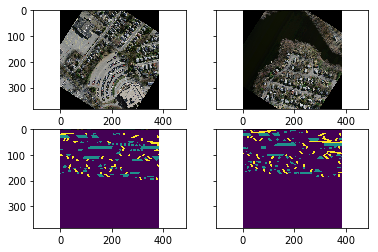

In [121]:
print(images_batch.shape)
print(annotations_batch.shape)
f, (ax1, ax2)= plt.subplots(2, 2, sharey=True)
ax1[0].imshow(images_batch_np[0])
ax2[0].imshow(np.squeeze(annotations_batch_np[0]), aspect=1)
ax1[1].imshow(images_batch_np[1])
ax2[1].imshow(np.squeeze(annotations_batch_np[1]), aspect=1)